In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv("cardio.csv")
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [20]:
df['age'] = round(df['age']/356, 2)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,51.67,2,168,62.0,110,80,1,1,0,0,1,0
1,1,56.82,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52.97,1,165,64.0,130,70,3,1,0,0,0,1
3,3,49.50,2,169,82.0,150,100,1,1,0,0,1,1
4,4,49.08,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,54.04,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,63.49,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,53.56,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,63.01,1,163,72.0,135,80,1,2,0,0,0,1


<Axes: >

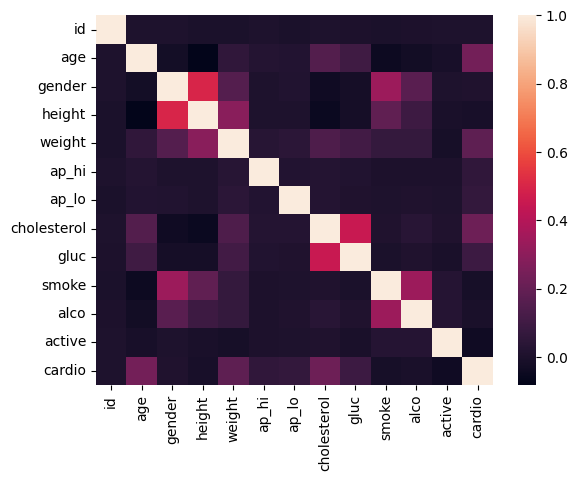

In [21]:
sns.heatmap(df.corr())

<Axes: xlabel='age', ylabel='weight'>

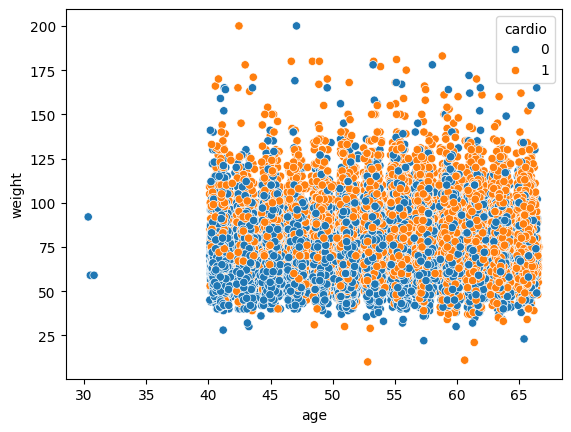

In [22]:
sns.scatterplot(x="age", y="weight", data=df, hue="cardio")

<Axes: xlabel='age', ylabel='Count'>

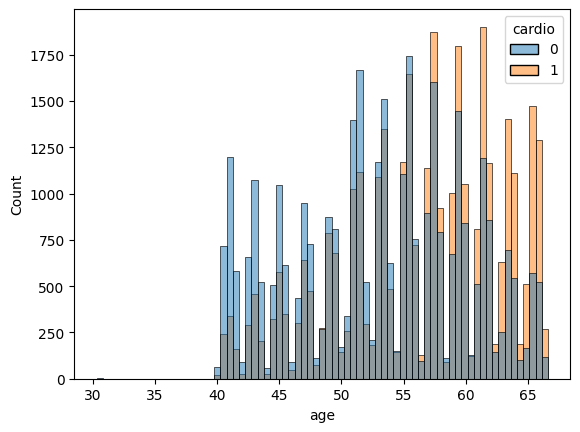

In [23]:
sns.histplot(df, x="age", hue='cardio')

In [33]:
from sklearn.model_selection import train_test_split

X = df.drop(['id', 'cardio'], axis=1)
y = df['cardio']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training samples: {X_train.shape}\nTesting samples: {X_test.shape}")

Training samples: (56000, 11)
Testing samples: (14000, 11)


In [35]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(10,90), verbose=True, learning_rate="constant", activation="relu")
mlp.fit(X_train, y_train)

Iteration 1, loss = 1.54089579
Iteration 2, loss = 0.69098167
Iteration 3, loss = 0.65457561
Iteration 4, loss = 0.64973395
Iteration 5, loss = 0.64241549
Iteration 6, loss = 0.62691761
Iteration 7, loss = 0.64234722
Iteration 8, loss = 0.63115631
Iteration 9, loss = 0.64039014
Iteration 10, loss = 0.62530897
Iteration 11, loss = 0.63651244
Iteration 12, loss = 0.62619336
Iteration 13, loss = 0.61389197
Iteration 14, loss = 0.62130116
Iteration 15, loss = 0.62261995
Iteration 16, loss = 0.60657087
Iteration 17, loss = 0.61404856
Iteration 18, loss = 0.60546304
Iteration 19, loss = 0.60141653
Iteration 20, loss = 0.61227296
Iteration 21, loss = 0.60995661
Iteration 22, loss = 0.60525085
Iteration 23, loss = 0.59791226
Iteration 24, loss = 0.59782661
Iteration 25, loss = 0.60002554
Iteration 26, loss = 0.59001227
Iteration 27, loss = 0.59707106
Iteration 28, loss = 0.59837021
Iteration 29, loss = 0.59219074
Iteration 30, loss = 0.59679740
Iteration 31, loss = 0.59614894
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(10, 90), verbose=True)

In [36]:
y_pred = mlp.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7239285714285715


In [38]:
X_train

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
47339,61.45,1,154,80.0,130,90,2,1,0,0,1
67456,46.96,2,162,70.0,140,90,1,1,0,0,0
12308,59.35,2,174,92.0,150,100,1,1,0,0,1
32557,65.63,2,173,76.0,120,82,1,1,0,0,1
664,56.97,1,160,60.0,120,80,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
37194,44.95,2,170,75.0,150,80,1,1,1,0,1
6265,65.19,2,162,73.0,160,90,1,1,0,0,1
54886,66.26,1,169,74.0,120,80,1,1,0,0,1
860,51.20,1,167,70.0,120,80,1,1,0,0,0


In [39]:
age = int(input())
gender = int(input("Enter gender 1: Female, 2: Male: "))
height = int(input("Enter height: "))
weight = int(input("Enter weight: "))
ap_hi = int(input())
ap_low = int(input())
cholestrol = int(input())
glucose = int(input())
smoke =int(input())
alchol =int(input())
active = int(input())
sample_input = [[age, gender, height, weight, ap_hi, ap_low, cholestrol, glucose, smoke, alchol, active]]

prediction = mlp.predict(sample_input)
print(prediction)

[0]


C:\Users\sselc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
